In [175]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [176]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


# Hackathon: Hack that Startup
- Team: Grupo 1


In [177]:
import pandas_datareader as dr
df = dr.data.get_data_yahoo('BTC-USD', start = '2017-01-01', end = '2021-01-01')

In [178]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,4.526595e+10,27362.437500
2020-12-30,28937.740234,27360.089844,27360.089844,28840.953125,5.128744e+10,28840.953125
2020-12-31,29244.876953,28201.992188,28841.574219,29001.720703,4.675496e+10,29001.720703
2021-01-01,29600.626953,28803.585938,28994.009766,29374.152344,4.073030e+10,29374.152344
2021-01-02,33155.117188,29091.181641,29376.455078,32127.267578,6.786542e+10,32127.267578


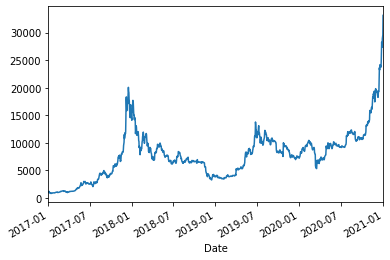

In [180]:
df['High'].plot()

In [232]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Candlestick(x=df.index,
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close']),
              secondary_y=True)

# include a go.Bar trace for volumes
fig.add_trace(go.Bar(x=df.index, y=df['Volume']),
               secondary_y=False)

fig.update_layout(
    title=f'BTC-USD Historical data from 2017-01-01 to 2021-01-01',
    yaxis_title='BTC-USD',
)

fig.layout.yaxis2.showgrid=False
fig.show()

In [182]:
df.shape

(1459, 6)

In [183]:
test_days = int(1459*0.05) # test rate

In [184]:
test = df.iloc[df.shape[0]-test_days:]

In [185]:
train = df.iloc[:df.shape[0]-test_days]

In [186]:
train

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,1.477750e+08,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,2.221850e+08,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,1.851680e+08,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,3.449460e+08,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,5.101990e+08,1013.380005
2017-01-06,1046.810059,883.943970,1014.239990,902.200989,3.518760e+08,902.200989
2017-01-07,908.585022,823.556030,903.487000,908.585022,2.795500e+08,908.585022
2017-01-08,942.723999,887.249023,908.174988,911.198975,1.587150e+08,911.198975
2017-01-09,913.685974,879.807007,913.244019,902.828003,1.418770e+08,902.828003


In [187]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [188]:
scaler.fit(train)

MinMaxScaler()

In [234]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [190]:
scaled_train

array([[0.00933125, 0.01113949, 0.01007881, 0.0117827 , 0.00117312,
        0.0117827 ],
       [0.0108007 , 0.01322546, 0.01194821, 0.01303406, 0.00217736,
        0.01303406],
       [0.01145938, 0.01459211, 0.01317721, 0.0142141 , 0.00167778,
        0.0142141 ],
       ...,
       [0.58013023, 0.59971009, 0.58665408, 0.59502084, 0.41641928,
        0.59502084],
       [0.64162028, 0.61175554, 0.59558975, 0.64349156, 0.58510456,
        0.64349156],
       [0.64042787, 0.65655462, 0.64310467, 0.65108797, 0.46789226,
        0.65108797]])

In [191]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [192]:
length = 71
batch_size = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size=batch_size)

In [193]:
len(generator)

1316

In [194]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN

In [195]:
scaled_train.shape

(1387, 6)

In [206]:
model = Sequential()
model.add(GRU(450, input_shape=(length,scaled_train.shape[1])))
#model.add(LSTM(110, input_shape=(length,scaled_train.shape[1])))
model.add(Dense(scaled_train.shape[1]))

In [207]:
model.compile(optimizer='rmsprop', loss='mse')

In [208]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_18 (GRU)                 (None, 450)               618300    
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 2706      
Total params: 621,006
Trainable params: 621,006
Non-trainable params: 0
_________________________________________________________________


In [218]:
from tensorflow.keras.callbacks import EarlyStopping
import os, datetime
early_stop = EarlyStopping(monitor = 'val_loss', patience = 0)
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
val_generator = TimeseriesGenerator(scaled_test, scaled_test, length = length, batch_size=batch_size)

In [221]:
model.fit(generator, epochs = 10, callbacks = [early_stop, tensorboard_callback], validation_data=val_generator)

Epoch 1/10
1316/1316 [==============================] - 124s 94ms/step - loss: 7.0613e-04 - val_loss: 0.0936
Epoch 2/10
1316/1316 [==============================] - 112s 85ms/step - loss: 7.1357e-04 - val_loss: 0.0624
Epoch 3/10
1316/1316 [==============================] - 118s 89ms/step - loss: 7.1260e-04 - val_loss: 0.1149


In [222]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [223]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 7688), started 0:28:25 ago. (Use '!kill 7688' to kill it.)

In [226]:
first_eval_batch = scaled_train[-length:]
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))
model.predict(first_eval_batch)

array([[0.6344397 , 0.63064957, 0.6536121 , 0.6189314 , 0.4103001 ,
        0.61704916]], dtype=float32)

In [227]:
scaled_test[0]

array([0.63286874, 0.65850616, 0.65219062, 0.64925286, 0.39022558,
       0.64925286])

In [228]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred) 

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [229]:
# Invertir el escalador y comparar con los valores reales
true_predictions = scaler.inverse_transform(test_predictions)

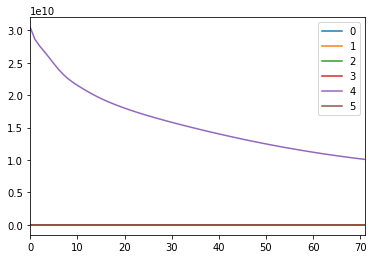

In [230]:
predictions_72 = pd.DataFrame(true_predictions)
predictions_72.plot()

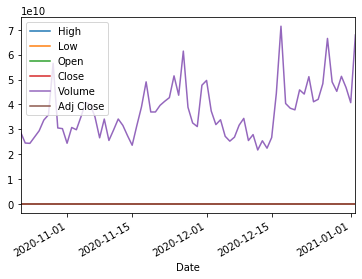

In [231]:
test.plot()

In [236]:
# Ahora hay que preprocesar todo el data frame 
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)
full_generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [237]:
model = Sequential()
model.add(GRU(440, input_shape=(length,scaled_train.shape[1])))
model.add(Dense(scaled_train.shape[1]))
model.compile('adam', loss = 'mse')

In [238]:
model.fit(full_generator, epochs = 2)

Epoch 1/2
1388/1388 [==============================] - 119s 85ms/step - loss: 0.0049
Epoch 2/2
1388/1388 [==============================] - 118s 85ms/step - loss: 9.6998e-04


In [239]:
forecast = []
# forecast 3 days into the future
periods = 3
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, 6))
for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [240]:
forecast = scaler.inverse_transform(forecast)

In [241]:
days_3 = pd.DataFrame(forecast)
# add index to our forecast predictions
forecast_index = pd.date_range(start='2021-01-03',periods=periods,freq='D')

In [242]:
forecast_final = pd.DataFrame(days_3.values, index = forecast_index)

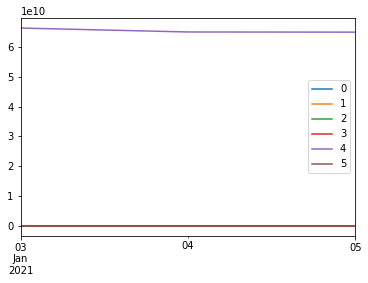

In [243]:
forecast_final.plot()